<h1> 5. Interactive Data Analysis </h1>

This notebook introduces carrying out interactive data analysis of data in BigQuery using Cloud Datalab.

This cell, for example, is a mark-down cell.  Which is why you are seeing text.

<h2> Relative path </h2>

I created this notebook in 05_bqdatalab folder of the git repo for the book. So, you might see a path that ends in that. But the path will start with /content which is mapped to a local folder on the computer that is running Datalab.

In [3]:
!pwd

/home/jovyan/workspace/data-science-on-gcp/05_bqdatalab


<h2> What's installed? </h2>

In [4]:
!pip freeze

alembic==0.9.9
arrow==0.13.1
asn1crypto==0.24.0
async-generator==1.10
attrs==18.2.0
backcall==0.1.0
beautifulsoup4==4.6.3
binaryornot==0.4.4
bleach==3.0.2
bokeh==0.13.0
cachetools==3.1.0
certifi==2019.3.9
cffi==1.11.5
chardet==3.0.4
Click==7.0
cloudpickle==0.5.6
conda==4.5.12
cookiecutter==1.6.0
cryptography==2.5
cryptography-vectors==2.3.1
cycler==0.10.0
Cython==0.28.5
cytoolz==0.9.0.1
dask==1.0.0
decorator==4.3.0
dill==0.2.8.2
entrypoints==0.3
fastcache==1.0.2
findspark==1.3.0
future==0.17.1
gmpy2==2.0.8
google-api-core==1.7.0
google-auth==1.6.3
google-cloud-bigquery==1.9.0
google-cloud-core==0.29.1
google-cloud-storage==1.14.0
google-resumable-media==0.3.2
googleapis-common-protos==1.5.8
h5py==2.7.1
idna==2.8
imageio==2.4.1
ipykernel==5.1.0
ipython==7.2.0
ipython-genutils==0.2.0
ipywidgets==7.4.2
jedi==0.13.2
Jinja2==2.10
jinja2-time==0.2.0
jsonschema==3.0.0a3
jupyter-client==5.2.4
jupyter-core==4.4.0
jupyterhub==0.9.2
jupyterlab==0.35.4
jupyterlab-server==0.2.0
kiwisolver==1.0.1
ll

<h2> Installing dependencies </h2>

Regular Python dependencies can be installed using pip

In [6]:
!pip install google-cloud

  Using cached https://files.pythonhosted.org/packages/ba/b1/7c54d1950e7808df06642274e677dbcedba57f75307adf2e5ad8d39e5e0e/google_cloud-0.34.0-py2.py3-none-any.whl


<h2> Calls to BigQuery </h2>

Let's draw a PDF of different arrival delays

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
from google.cloud import bigquery
import os

In [8]:
client = bigquery.Client()

/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

In [9]:
sql = """
SELECT ARR_DELAY, DEP_DELAY
FROM `workshop-trvlk.events.flights_perf_nopartition`
WHERE DEP_DELAY >= 10 AND RAND() < 0.01
"""
df = client.query(sql).to_dataframe()

In [10]:
df.describe()

,ARR_DELAY,DEP_DELAY
count,92777.000000,93281.000000
mean,45.284521,49.331418
std,60.000188,57.728908
min,-56.000000,10.000000
25%,11.000000,17.000000
50%,27.000000,29.000000
75%,59.000000,60.000000
max,1515.000000,1506.000000


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


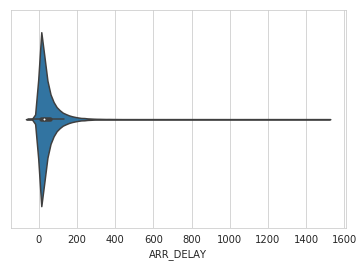

In [11]:
sns.set_style("whitegrid")
ax = sns.violinplot(data=df, x='ARR_DELAY', inner='box', orient='h')
#ax.axes.set_xlim(0, 30)

In [12]:
sql = """
SELECT ARR_DELAY, DEP_DELAY
FROM `workshop-trvlk.events.flights_perf_nopartition`
WHERE RAND() < 0.001
"""
df = client.query(sql).to_dataframe()

In [13]:
df.describe()

,ARR_DELAY,DEP_DELAY
count,41680.000000,41799.000000
mean,4.818018,9.196177
std,37.626450,35.385337
min,-63.000000,-28.000000
25%,-12.000000,-5.000000
50%,-4.000000,-1.000000
75%,8.000000,7.000000
max,1589.000000,1574.000000


In [14]:
df['ontime'] = df['DEP_DELAY'] < 10
df[df['ARR_DELAY'] > 0].head()

,ARR_DELAY,DEP_DELAY,ontime
1,21.0,-6.0,True
3,192.0,197.0,False
4,115.0,127.0,False
6,21.0,30.0,False
7,53.0,53.0,False


(-50, 200)

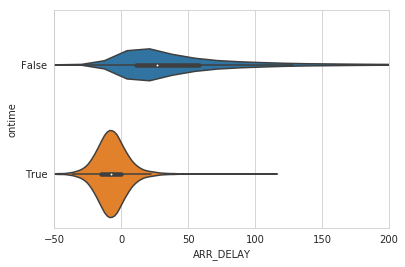

In [15]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.violinplot(data=df, x='ARR_DELAY', y='ontime', inner='box', orient='h')
ax.set_xlim(-50, 200)

(-50, 50)

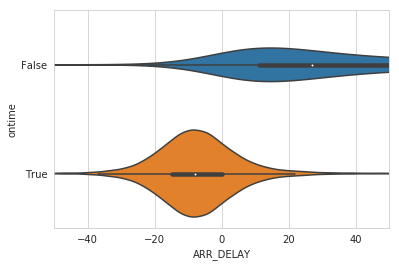

In [16]:
ax = sns.violinplot(data=df, x='ARR_DELAY', y='ontime', 
                    inner='box', orient='h', gridsize=1000)
ax.set_xlim(-50, 50)

In [17]:
depdelayquery = """
SELECT
  *
FROM (
  SELECT
    DEP_DELAY,
    AVG(ARR_DELAY) AS arrival_delay,
    STDDEV(ARR_DELAY) AS stddev_arrival_delay,
    COUNT(ARR_DELAY) AS numflights
  FROM
    `workshop-trvlk.events.flights_perf_nopartition`
  GROUP BY
    DEP_DELAY )
WHERE
  numflights > 370
ORDER BY
  DEP_DELAY
"""

In [18]:
depdelay = client.query(depdelayquery).to_dataframe()
depdelay[:5]

,DEP_DELAY,arrival_delay,stddev_arrival_delay,numflights
0,-30.0,-28.567568,14.662533,407
1,-29.0,-26.045249,14.379935,442
2,-28.0,-26.089376,13.997603,593
3,-27.0,-25.947874,13.032926,729
4,-26.0,-25.145631,12.596379,1030


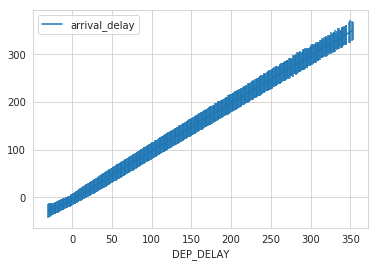

In [19]:
ax = depdelay.plot(kind='line', x='DEP_DELAY', 
              y='arrival_delay', yerr='stddev_arrival_delay')

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'> 30% likelihood of this Arrival Delay (minutes)')

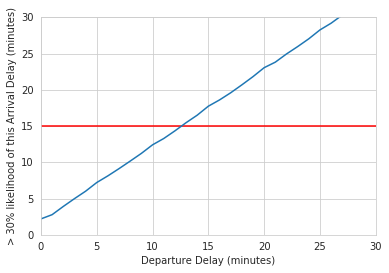

In [20]:
import matplotlib.pyplot as plt
Z_30 = 0.52
depdelay['arr_delay_30'] = (Z_30 * depdelay['stddev_arrival_delay']) \
             + depdelay['arrival_delay']
plt.axhline(y=15, color='r')
ax = plt.axes()
depdelay.plot(kind='line', x='DEP_DELAY', y='arr_delay_30',
              ax=ax, ylim=(0,30), xlim=(0,30), legend=False)
ax.set_xlabel('Departure Delay (minutes)')
ax.set_ylabel('> 30% likelihood of this Arrival Delay (minutes)')

In [21]:
depdelayquery2 = """
SELECT
  DEP_DELAY,
  arrival_delay,
  numflights
FROM (
  SELECT
    DEP_DELAY,
    APPROX_QUANTILES(ARR_DELAY,
      101)[OFFSET(70)] AS arrival_delay,
    COUNT(ARR_DELAY) AS numflights
  FROM
    `workshop-trvlk.events.flights_perf_nopartition`
  GROUP BY
    DEP_DELAY )
WHERE
  numflights > 370
ORDER BY
  DEP_DELAY
"""

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'> 30% likelihood of this Arrival Delay (minutes)')

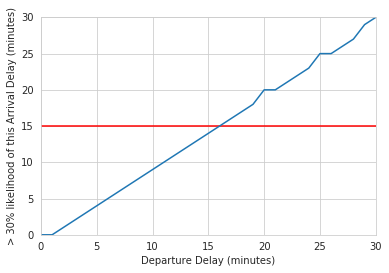

In [22]:
depdelay = client.query(depdelayquery2).to_dataframe()
plt.axhline(y=15, color='r')
ax = plt.axes()
depdelay.plot(kind='line', x='DEP_DELAY', y='arrival_delay',
              ax=ax, ylim=(0,30), xlim=(0,30), legend=False)
ax.set_xlabel('Departure Delay (minutes)')
ax.set_ylabel('> 30% likelihood of this Arrival Delay (minutes)')

In [23]:
depdelayquery3 = """
SELECT
  DEP_DELAY,
  arrival_delay,
  numflights
FROM (
  SELECT
    DEP_DELAY,
    APPROX_QUANTILES(ARR_DELAY,
      101)[OFFSET(70)] AS arrival_delay,
    COUNT(ARR_DELAY) AS numflights
  FROM
    `workshop-trvlk.events.flights_perf_nopartition` f
  JOIN
    `workshop-trvlk.events.trainday` t
  ON
    f.FL_DATE = t.FL_DATE
  WHERE
    t.is_train_day = 'True'
  GROUP BY
    DEP_DELAY )
WHERE
  numflights > 370
ORDER BY
  DEP_DELAY
"""

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'> 30% likelihood of this Arrival Delay (minutes)')

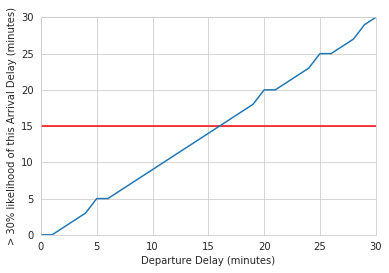

In [25]:
depdelay = client.query(depdelayquery3).to_dataframe()
plt.axhline(y=15, color='r')
ax = plt.axes()
depdelay.plot(kind='line', x='DEP_DELAY', y='arrival_delay',
              ax=ax, ylim=(0,30), xlim=(0,30), legend=False)
ax.set_xlabel('Departure Delay (minutes)')
ax.set_ylabel('> 30% likelihood of this Arrival Delay (minutes)')

In [26]:
evalquery = """
SELECT
  SUM(IF(DEP_DELAY < 16
      AND arr_delay < 15, 1, 0)) AS correct_nocancel,
  SUM(IF(DEP_DELAY < 16
      AND arr_delay >= 15, 1, 0)) AS wrong_nocancel,
  SUM(IF(DEP_DELAY >= 16
      AND arr_delay < 15, 1, 0)) AS wrong_cancel,
  SUM(IF(DEP_DELAY >= 16
      AND arr_delay >= 15, 1, 0)) AS correct_cancel
FROM (
  SELECT
    DEP_DELAY,
    ARR_DELAY
  FROM
    `workshop-trvlk.events.flights_perf_nopartition` f
  JOIN
    `workshop-trvlk.events.trainday` t
  ON
    f.FL_DATE = t.FL_DATE
  WHERE
    t.is_train_day = 'False' )
"""

In [28]:
eval = client.query(evalquery).to_dataframe()
print(eval['correct_nocancel'] / (eval['correct_nocancel'] + \
eval['wrong_nocancel']))
print(eval['correct_cancel'] / (eval['correct_cancel'] + \
eval['wrong_cancel']))

0    0.945359
dtype: float64
0    0.819308
dtype: float64


In [29]:
eval.head()

,correct_nocancel,wrong_nocancel,wrong_cancel,correct_cancel
0,9948073,574986,400103,1814181


In [30]:
evalquery2="""
SELECT
  SUM(IF(DEP_DELAY = 15
      AND arr_delay < 15, 1, 0)) AS correct_nocancel,
  SUM(IF(DEP_DELAY = 15
      AND arr_delay >= 15, 1, 0)) AS wrong_nocancel,
  SUM(IF(DEP_DELAY = 16
      AND arr_delay < 15, 1, 0)) AS wrong_cancel,
  SUM(IF(DEP_DELAY = 16
      AND arr_delay >= 15, 1, 0)) AS correct_cancel
FROM (
  SELECT
    DEP_DELAY,
    ARR_DELAY
  FROM
    `workshop-trvlk.events.flights_perf_nopartition` f
  JOIN
    `workshop-trvlk.events.trainday` t
  ON
    f.FL_DATE = t.FL_DATE
  WHERE
    t.is_train_day = 'False' )
"""

In [31]:
eval = client.query(evalquery2).to_dataframe()
eval.head()

,correct_nocancel,wrong_nocancel,wrong_cancel,correct_cancel
0,61904,26921,53624,26452


In [32]:
print(eval['correct_nocancel'] / (eval['correct_nocancel'] + \
eval['wrong_nocancel']))
print(eval['correct_cancel'] / (eval['correct_cancel'] + \
eval['wrong_cancel']))

0    0.696921
dtype: float64
0    0.330336
dtype: float64
